# **Phase 4**

## **Unsupervised ML (Clustering)**

**In this phase, our goal is to apply unsupervised machine learning techniques, specifically clustering, to analyze crime datasets and provide actionable insights for higher authorities. The assumption is that we have various crime datasets containing information about different districts in each state.**

### **4.1 Create 3 Clusters: Sensitive Areas, Moderate Areas, Peaceful Areas**

To begin, we'll perform unsupervised clustering to categorize the districts into three clusters based on crime data. These clusters will be labeled as follows:

- **Sensitive Areas:** Districts with high crime rates and complex criminal activities.
- **Moderate Areas:** Districts with moderate crime rates and a balanced mix of criminal activities.
- **Peaceful Areas:** Districts with low crime rates and a generally safe environment.

### **4.2 Create DataFrames for Each Cluster**
Once the clustering is done, we'll create separate DataFrames for each cluster. These DataFrames will provide a detailed view of the crime data specific to each type of area, facilitating targeted analysis.

### **4.3 Analyze Clusters and Prepare a Report**
Analyzing clusters and Preparing Report

In [69]:
# Importing Important Libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [70]:
# Importing Data for Phase 4

IPC_2001_2012 = pd.read_csv('/content/drive/MyDrive/DataSets/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv')
crime_against_children = pd.read_csv('/content/drive/MyDrive/DataSets/India_Crime - Copy/03_District_wise_crimes_committed_against_children_2001_2012.csv')
crime_against_women = pd.read_csv('/content/drive/MyDrive/DataSets/India_Crime - Copy/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crime_2001_2012 = pd.read_csv('/content/drive/MyDrive/DataSets/India_Crime - Copy/crimes_committed_against_SC_2001_2012.csv')
crime_in_st = pd.read_csv('/content/drive/MyDrive/DataSets/India_Crime - Copy/02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [71]:
crime_2001_2012

,STATE/UT,DISTRICT,YEAR,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities Act,Protection of Civil Rights Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
8593,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
8595,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0


**Now will Analyze each file and check for Nulls/Duplicates and all necessary processes.**

## **1) District wise crimes committed classified by IPC from 2001 to 2012**

In [72]:
# District wise crimes committed classified by IPC from 2001 to 2012

IPC_2001_2012

IPC_2001_2012.shape

(9017, 33)

In [73]:
IPC_2001_2012.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [74]:
IPC_2001_2012.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

<Axes: >

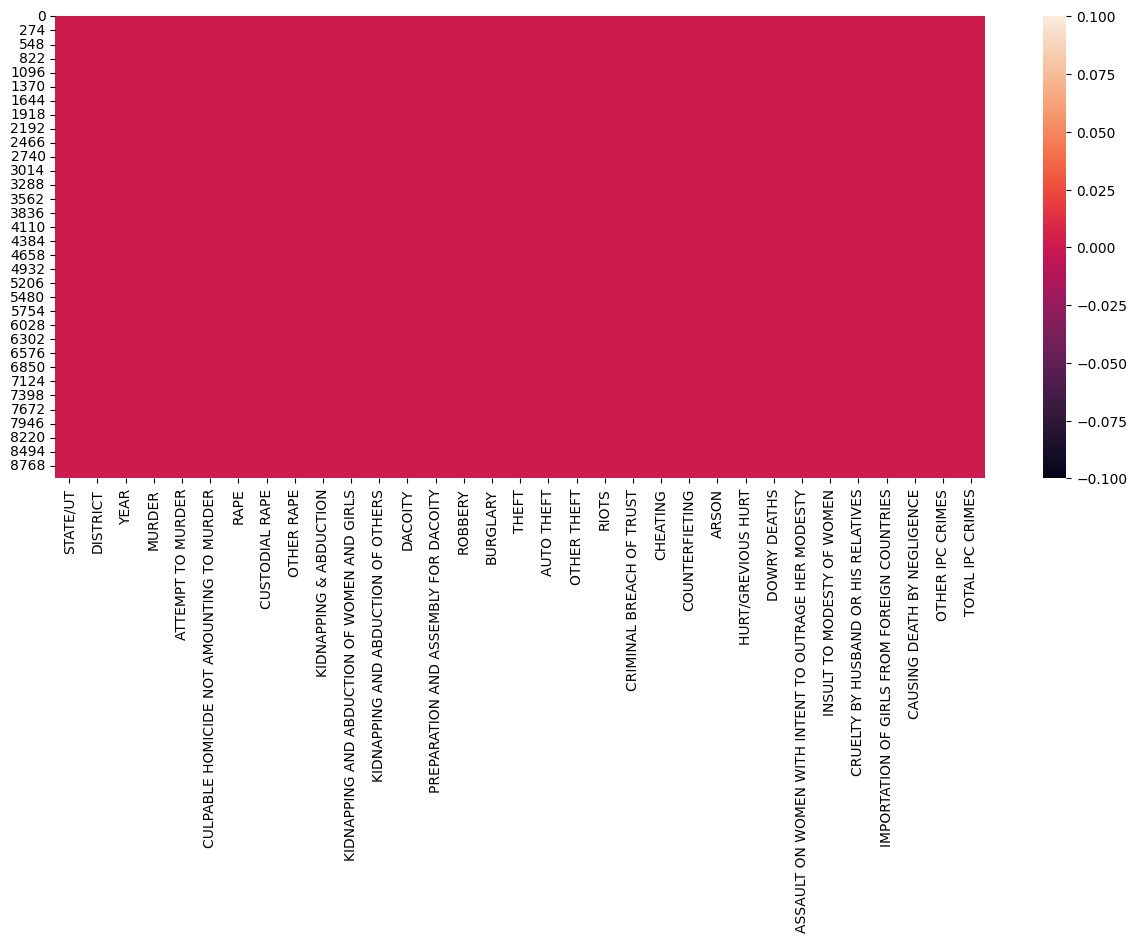

In [75]:
plt.figure(figsize=(15,6))
sns.heatmap(IPC_2001_2012.isnull())

**From above Heatmap and .isnull(), no any null value found in given dataset.**

In [76]:
# Duplicate

IPC_2001_2012.duplicated().sum()

0

**No dupliate found**

In [77]:
# In the dataset, a 'TOTAL' row is present for each STATE/UT and DISTRICT.
# This row aggregates values across all other variables, potentially inuencing query outcomes due to its cumulative nature.
# To ensure simplicity and accuracy in analysis, it is advisable to remove rows containing 'TOTAL' entries.

IPC_2001_2012 = IPC_2001_2012[IPC_2001_2012['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [78]:
# Renaming Year column to YEAR

IPC_2001_2012.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [79]:
# Also Dropping TOTAL IPC CRIMES column

IPC_2001_2012.drop('TOTAL IPC CRIMES', axis = 1, inplace = True)

In [80]:
# Now, Adding up total crimes classified by IPC

IPC_2001_2012['TOTAL IPC CRIMES'] = IPC_2001_2012.iloc[:, 3:].sum(axis = 1)

IPC_2001_2012.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4449
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4567
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,6627
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3358
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,7600


## **2) District wise crimes committed against children from 2001 to 2012**

In [81]:
crime_against_children.shape

(9015, 15)

In [82]:
crime_against_children.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')

<Axes: >

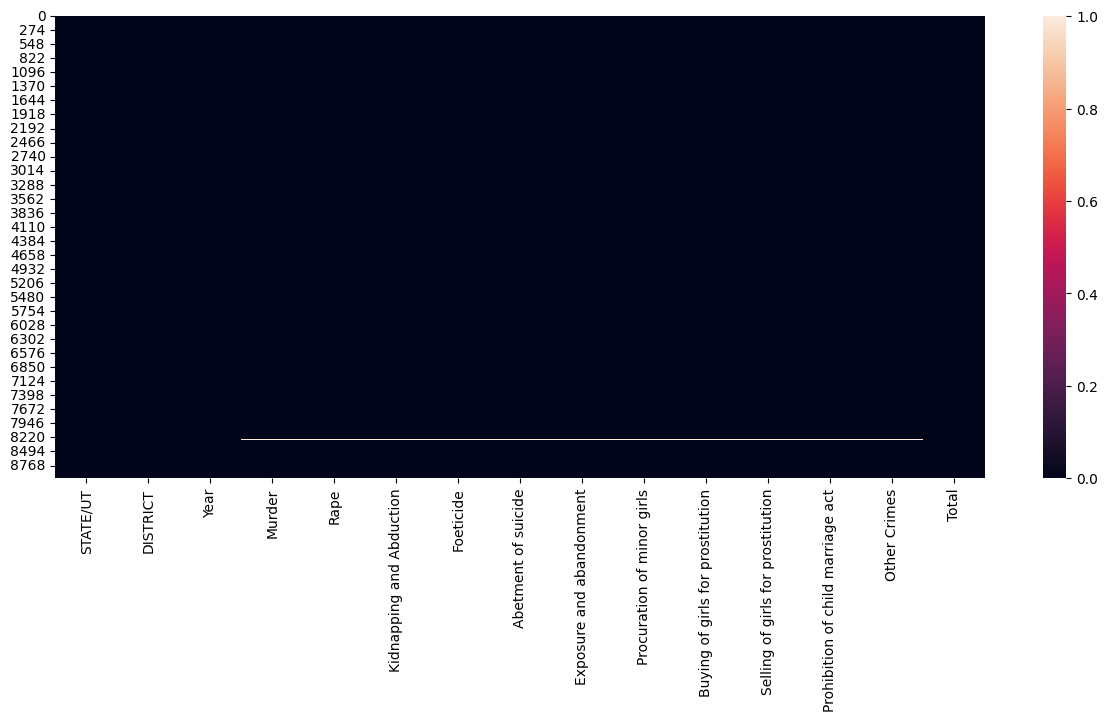

In [83]:
crime_against_children.isnull().sum()

plt.figure(figsize=(15,6))
sns.heatmap(crime_against_children.isnull())

In [84]:
# Checking Duplicated

crime_against_children.duplicated().sum()

1

In [85]:
crime_against_children = crime_against_children.drop_duplicates()

 **From above Heatmap and .isnull(), we have null values in Murder, Rape, Kidnapping and abduction,Foeticide,Abetment of suicide ,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes columns**


In [86]:
# As its not dummy data, hence can ot be filled NaNs with mean, median values of column.
# Filling NaNs with 0

crime_against_children.fillna(0,inplace=True)

<ipython-input-86-b3dfe0cdd342>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_against_children.fillna(0,inplace=True)


In [87]:
# In the dataset, a 'TOTAL' row is present for each STATE/UT and DISTRICT.
# This row aggregates values across all other variables, potentially inuencing query outcomes due to its cumulative nature.
# To ensure simplicity and accuracy in analysis, it is advisable to remove rows containing 'TOTAL' entries.

crime_against_children = crime_against_children[crime_against_children['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [88]:
# Renaming column Names

crime_against_children.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [89]:
# Adding up total crimes against children

crime_against_children['TOTAL CRIMES AGAINST CHILDREN'] = crime_against_children.iloc[:, 3:].sum(axis = 1)

In [90]:
crime_against_children = crime_against_children[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST CHILDREN']]

crime_against_children.head()

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,132.0
2,ANDHRA PRADESH,CHITTOOR,2001,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0


## **3) District wise crimes committed against women from 2001 to 2012**

In [91]:
crime_against_women.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


<Axes: >

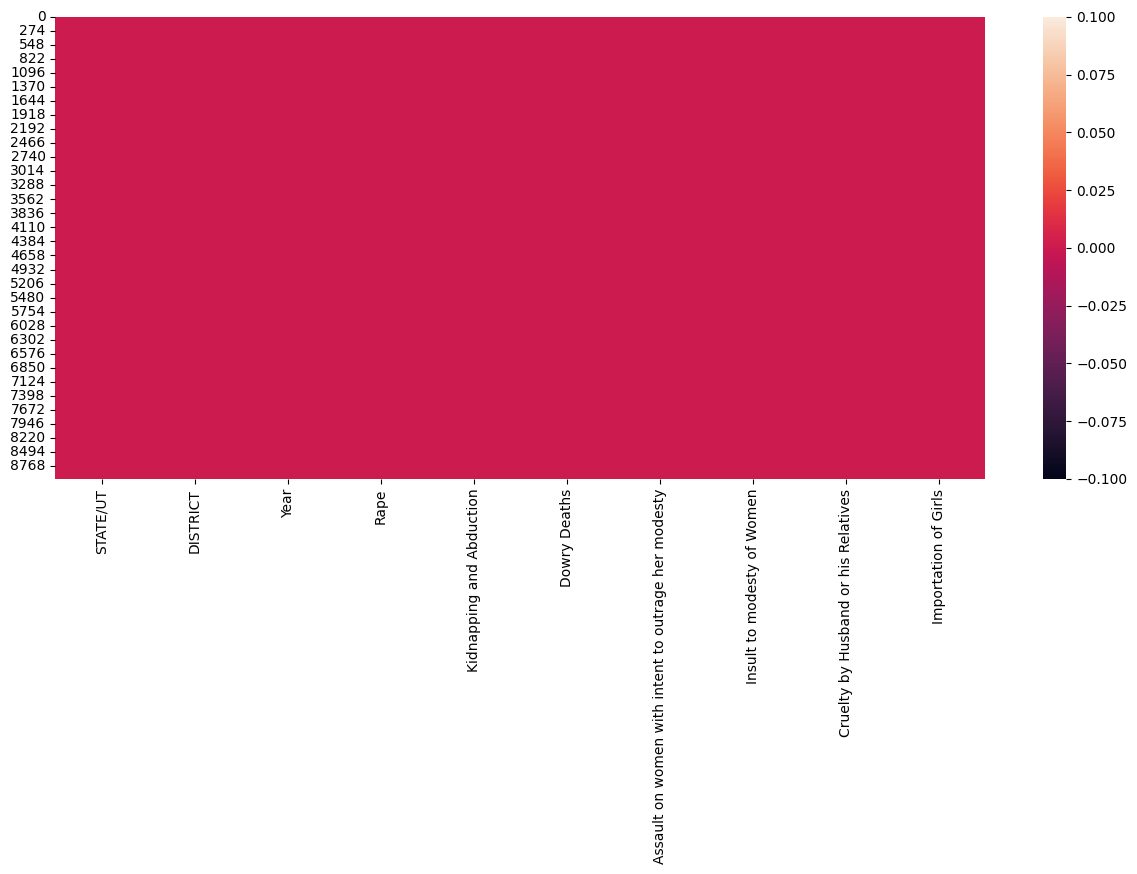

In [92]:
crime_against_women.isnull().sum()

plt.figure(figsize=(15,6))
sns.heatmap(crime_against_women.isnull())

In [93]:
crime_against_women.duplicated().sum()

0

**No any dupliated and Null Values present in dataset**

In [94]:
# In the dataset, a 'TOTAL' row is present for each STATE/UT and DISTRICT.
# This row aggregates values across all other variables, potentially inuencing query outcomes due to its cumulative nature.
# To ensure simplicity and accuracy in analysis, it is advisable to remove rows containing 'TOTAL' entries.

crime_against_women = crime_against_women[crime_against_women['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [95]:
# Renaming column Names

crime_against_women.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [96]:
# Adding up total crimes against women

crime_against_women['TOTAL CRIMES AGAINST WOMEN'] = crime_against_women.iloc[:, 3:].sum(axis = 1)
crime_against_women = crime_against_women[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST WOMEN']]

In [97]:
crime_against_women.head()

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475


## **4) District wise crimes committed against SCs from 2001 to 2012**

In [98]:
crime_2001_2012.head()

,STATE/UT,DISTRICT,YEAR,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities Act,Protection of Civil Rights Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


<Axes: >

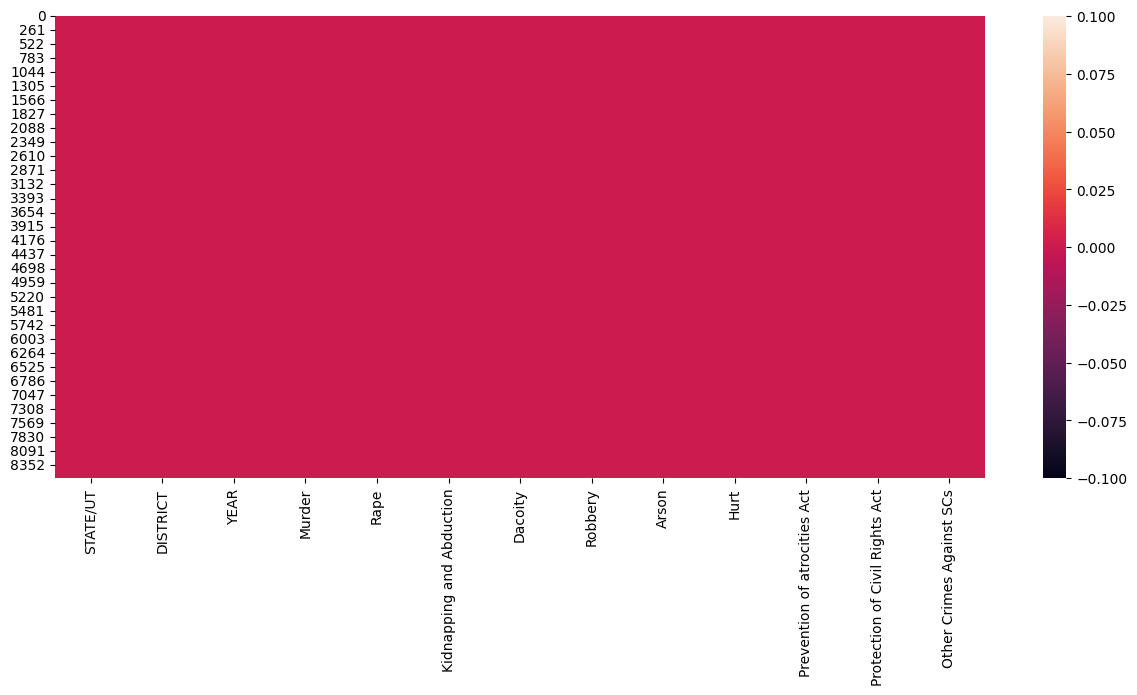

In [99]:
crime_2001_2012.isnull().sum()

plt.figure(figsize=(15,6))
sns.heatmap(crime_2001_2012.isnull())

In [100]:
crime_2001_2012.duplicated().sum()

1

In [101]:
crime_2001_2012.dtypes

STATE/UT                          object
DISTRICT                          object
YEAR                               int64
Murder                             int64
Rape                               int64
Kidnapping and Abduction           int64
Dacoity                            int64
Robbery                            int64
Arson                              int64
Hurt                               int64
Prevention of atrocities Act       int64
Protection of Civil Rights Act     int64
Other Crimes Against SCs           int64
dtype: object

In [102]:
crime_2001_2012.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities Act', 'Protection of Civil Rights Act',
       'Other Crimes Against SCs'],
      dtype='object')

## **5) District wise crimes committed against STs from 2001 to 2012**

In [103]:
crime_in_st.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


<Axes: >

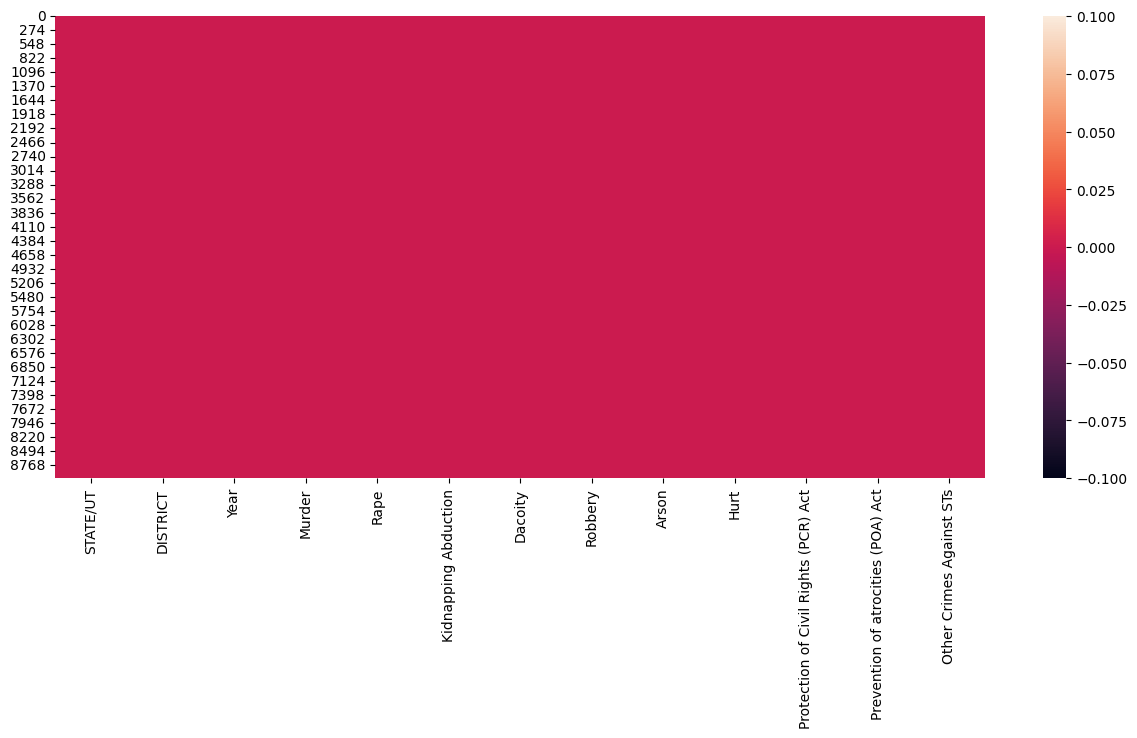

In [104]:
# Checking for Null

crime_in_st.isnull().sum()

plt.figure(figsize=(15,6))
sns.heatmap(crime_in_st.isnull())

**No Null Values presnt in dataset**

In [105]:
crime_in_st.duplicated().sum()

2

In [106]:
# Droppin the duplicated

crime_in_st.drop_duplicates(keep = 'first', inplace = True)

In [107]:
# In the dataset, a 'TOTAL' row is present for each STATE/UT and DISTRICT.
# This row aggregates values across all other variables, potentially inuencing query outcomes due to its cumulative nature.
# To ensure simplicity and accuracy in analysis, it is advisable to remove rows containing 'TOTAL' entries.

crime_in_st = crime_in_st[crime_in_st['DISTRICT'] != 'TOTAL'].reset_index(drop = True)

In [108]:
# Renaming Year column to YEAR

crime_in_st.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [109]:
# Adding up total crimes against STs

crime_in_st['TOTAL CRIMES AGAINST STs'] = crime_in_st.iloc[:, 3:].sum(axis = 1)
crime_in_st = crime_in_st[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL CRIMES AGAINST STs']]

## **Now Will merge all dataset for get one main dataset**

In [110]:
main_df = pd.merge(IPC_2001_2012,crime_against_children, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

main_df = pd.merge(main_df,crime_against_women, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

main_df = pd.merge(main_df,crime_2001_2012, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

main_df = pd.merge(main_df,crime_in_st, on = ['STATE/UT', 'DISTRICT', 'YEAR'], how = 'inner')

In [111]:
main_df.shape

(8407, 46)

In [112]:
# As per given problem we have to create/ perform cluster on merged dataset.

# Dropping unnessary column from df for sake of simplicity

main_df.drop(columns = 'YEAR', inplace = True)

In [113]:
# Now, Will perform Group by with STATE/UT and DISTRICT, to get proper understading of the data

main_df = main_df.groupby(['STATE/UT','DISTRICT']).sum().reset_index()

main_df.shape

(801, 45)

### **Now, will Move towards clustering of the data, Will find value of k**

In [114]:
# Before finding k, we have to normalize data

x = main_df[['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL CRIMES AGAINST CHILDREN', 'TOTAL CRIMES AGAINST WOMEN', 'Murder',
       'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson',
       'Hurt', 'Prevention of atrocities Act',
       'Protection of Civil Rights Act', 'Other Crimes Against SCs',
       'TOTAL CRIMES AGAINST STs']]


from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
main_df_new = scaler.fit_transform(x)
print(main_df_new)
df1 = pd.DataFrame(main_df_new)

[[-0.99615768 -0.85984007 -0.56459199 ... -0.21358668 -0.49891709
  -0.53964216]
 [-0.78177266 -0.81401196 -0.38507373 ... -0.21358668 -0.49891709
  -0.33791678]
 [-1.02321598 -0.89941889 -0.57515189 ... -0.21358668 -0.49891709
  -0.54594608]
 ...
 [-0.93995967 -0.89316961 -0.5117925  ... -0.21358668 -0.49891709
  -0.53964216]
 [-0.96077375 -0.88692032 -0.5117925  ... -0.21358668 -0.49891709
  -0.49551474]
 [ 0.30055946  1.3128289   1.09331197 ... -0.21358668 -0.49641286
  -0.38834813]]


In [115]:
from sklearn.cluster import KMeans

wcss=[]  # WCSS Empty list

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1525286394579.0205, 762701631465.7861, 401521265242.0099, 265303007023.27264, 204553830117.0785, 157886597307.4101, 133098505460.59106, 111963934878.23735, 101322656193.90778, 91391500065.06133]


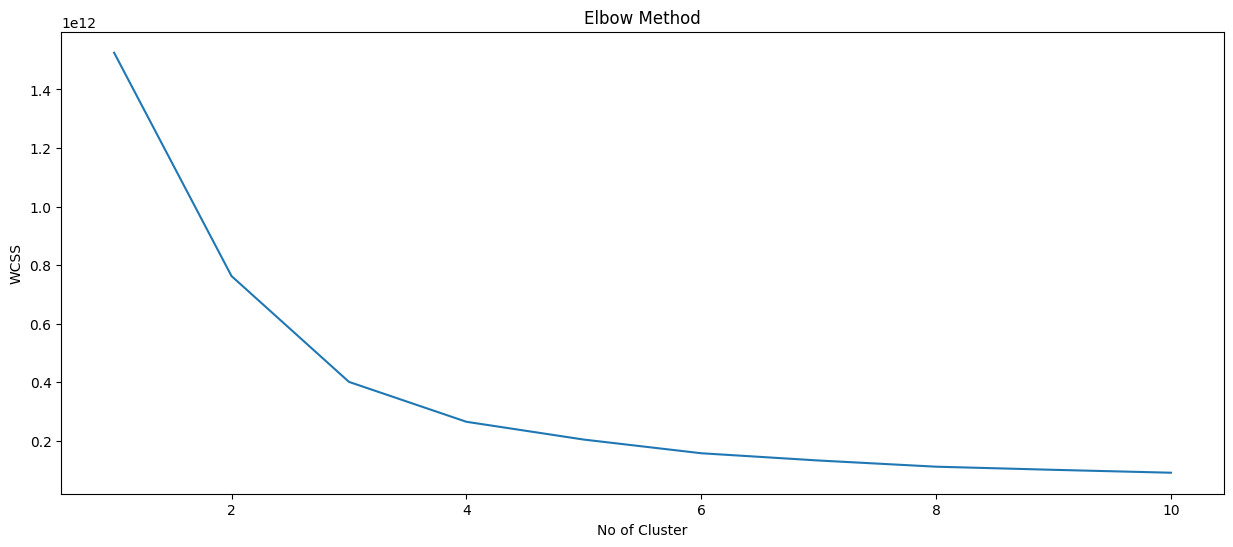

In [116]:
# Plottting Elbow chart for claring understanding
plt.figure(figsize=(15,6))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

### **From the above elbow chart, it is evident that beyond k=3, the elbow of the curve remains relatively flat. Therefore, considering the point where k=3 provides a reasonable choice**



In [117]:
# Fitting fpor k-means clustering

kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 100)

kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=100)

In [118]:
y_kmeans = kmeans.fit_predict(df1)

y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [119]:
# By Default clusering will start with 0, but for simplicity will start with 1

y_kmeans1=y_kmeans+1

In [120]:
formed_cluster = list(y_kmeans1)

main_df['formed_cluster'] = formed_cluster

In [121]:
main_df.columns

Index(['STATE/UT', 'DISTRICT', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'TOTAL CRIMES AGAINST CHILDREN', 'TOTAL CRIMES AGAINST WOMEN', 'Murder',
       'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson',
       'Hurt', 'Prevention of atrocities Ac

### **Showcasing Cluster**

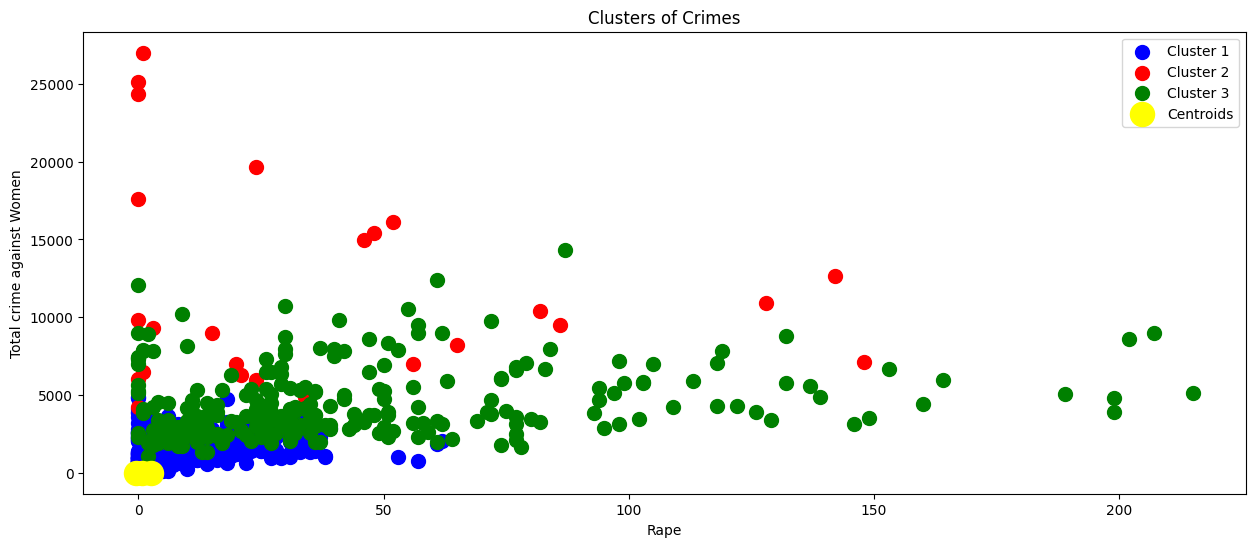

In [122]:

plt.figure(figsize=(15,6))
plt.scatter(x[y_kmeans1 == 1]['Rape'], x[y_kmeans1 == 1]['TOTAL CRIMES AGAINST WOMEN'], s = 100, c = 'blue', label = 'Cluster 1')

plt.scatter(x[y_kmeans1 == 2]['Rape'], x[y_kmeans1 == 2]['TOTAL CRIMES AGAINST WOMEN'], s = 100, c = 'red', label = 'Cluster 2')

plt.scatter(x[y_kmeans1 == 3]['Rape'], x[y_kmeans1 == 3]['TOTAL CRIMES AGAINST WOMEN'], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('Rape')
plt.ylabel('Total crime against Women')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

In [123]:
main_df.head()

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities Act,Protection of Civil Rights Act,Other Crimes Against SCs,TOTAL CRIMES AGAINST STs,formed_cluster
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,3,5,0,9,90,112,8,104,17,7,23,1,11,99,1,21,2,18,0,4,337,934,20.0,54,0,0,0,0,0,0,0,0,0,0,1,1
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,12,4,0,63,708,918,77,841,115,57,196,9,80,910,3,168,37,97,0,32,3638,8460,412.0,458,0,0,0,0,0,0,0,0,0,0,33,1
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,0,1,0,0,0,4,0,4,0,0,2,0,0,4,0,1,0,0,0,1,8,29,4.0,2,0,0,0,0,0,0,0,0,0,0,0,1
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,1,1,0,0,23,23,0,23,0,3,3,0,3,34,0,8,0,1,0,0,117,261,2.0,11,0,0,0,0,0,0,0,0,0,0,3,1
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,0,0,0,1,6,13,0,13,0,0,3,0,0,8,0,2,1,2,0,0,70,132,14.0,9,0,0,0,0,0,0,0,0,0,0,0,1


## **Clustering**

1. **Sensitive Area's**
2. **Moderate Area's**
3. **Peaceful Area's**

In [124]:
# fiting kmeans clustring with k=3

kmeans_clusters = KMeans(n_clusters = 3, random_state = 100)

cluster = kmeans_clusters.fit_predict(main_df.iloc[:, 2:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Creating datafreame for each as per given areas**

In [125]:
SensitiveAreas = main_df[cluster == 2]

SensitiveAreas

ModerateAreas = main_df[cluster == 1]

ModerateAreas

PeacefulAreas = main_df[cluster == 0]

PeacefulAreas


,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities Act,Protection of Civil Rights Act,Other Crimes Against SCs,TOTAL CRIMES AGAINST STs,formed_cluster
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,3,5,0,9,90,112,8,104,17,7,23,1,11,99,1,21,2,18,0,4,337,934,20.0,54,0,0,0,0,0,0,0,0,0,0,1,1
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,12,4,0,63,708,918,77,841,115,57,196,9,80,910,3,168,37,97,0,32,3638,8460,412.0,458,0,0,0,0,0,0,0,0,0,0,33,1
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,0,1,0,0,0,4,0,4,0,0,2,0,0,4,0,1,0,0,0,1,8,29,4.0,2,0,0,0,0,0,0,0,0,0,0,0,1
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,1,1,0,0,23,23,0,23,0,3,3,0,3,34,0,8,0,1,0,0,117,261,2.0,11,0,0,0,0,0,0,0,0,0,0,3,1
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,0,0,0,1,6,13,0,13,0,0,3,0,0,8,0,2,1,2,0,0,70,132,14.0,9,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,78,63,182,278,49,2526,246,2280,920,64,376,1,24,205,106,601,0,1778,0,206,7976,20257,16.0,3180,1,1,0,0,0,0,0,1,0,5,9,1
797,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,31,18,152,115,0,2981,4,2977,128,17,94,9,0,247,11,56,2,10,0,4,549,7813,4.0,134,0,0,0,0,0,0,0,0,0,0,0,1
798,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,8,13,6,15,1,1154,0,1154,26,3,6,3,0,0,3,31,1,1,0,0,413,2947,14.0,61,0,0,0,0,0,0,0,0,0,0,1,1
799,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,12,3,5,29,3,849,365,484,9,53,195,0,3,812,3,35,12,370,0,69,385,4016,88.0,552,0,0,0,0,0,0,0,0,0,0,8,1


**As above we have defined clusters for areas**

## **4.3 Analyse your clusters and prepare a report that explains all your observations.**

1. **What is impacting more crimes in sensitive areas.**

In [133]:
SensitiveAreas = SensitiveAreas[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES','TOTAL CRIMES AGAINST CHILDREN', 'TOTAL CRIMES AGAINST WOMEN']]

SensitiveAreas

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
10,ANDHRA PRADESH,CYBERABAD,173447,592.0,15411
15,ANDHRA PRADESH,HYDERABAD CITY,261276,1744.0,19685
121,BIHAR,PATNA,175558,1786.0,5931
168,GUJARAT,AHMEDABAD COMMR.,278467,2870.0,14973
304,KARNATAKA,BANGALORE COMMR.,459437,1350.0,9010
372,MADHYA PRADESH,BHOPAL,196550,2652.0,7087
386,MADHYA PRADESH,INDORE,247160,8802.0,10392
436,MAHARASHTRA,MUMBAI,198320,2042.0,4251
437,MAHARASHTRA,MUMBAI COMMR.,310755,5730.0,9304
449,MAHARASHTRA,PUNE COMMR.,190804,6782.0,6283


**Observation:**
- The mean (average) number of IPC crimes in Sensitive Areas is approximately 227,804.The range of total IPC crimes is from a minimum of 149,975 to a maximum of 459,437.
- The mean number of crimes against children in Sensitive Areas is approximately 3,152, with a standard deviation of about 2,360.The range of total crimes against children is from a minimum of 592 to a maximum of 8,802.
- The mean number of crimes against women in Sensitive Areas is approximately 11,118.The range of total crimes against women is from a minimum of 4,251 to a maximum of 24,376.
- **Sensitive Areas exhibit a high mean and a wide range of total IPC crimes. Factors contributing to this may include complex socio-economic conditions, population density, and the presence of organized criminal activities.**
- **The mean number of crimes against children is relatively high, indicating that Sensitive Areas may face challenges related to child safety. Social and economic factors influencing child vulnerability could be contributing to this.**
- **The mean number of crimes against women is particularly high, suggesting a significant impact on the safety and well-being of women in Sensitive Areas. Socio-cultural factors, gender-based violence, and law enforcement effectiveness may play roles in these crime rates.**


#### **To prevent this types of crimes follwing steps can be take,**

1. **Education and Awareness:** Conduct awareness campaigns to educate the public about legal consequences and penalties associated with different crimes.Promote legal literacy to ensure people are aware of their rights and responsibilities.
2. **Community Engagement:** Establish community watch programs to enhance local surveillance and promote a sense of shared responsibility.Foster strong community bonds and encourage residents to actively participate in crime prevention programs.
3. **Social and Economic Interventions:** Address socio-economic factors such as poverty, unemployment, and lack of education that can contribute to criminal behavior.Implement programs that provide economic opportunities and support vulnerable populations.
4. **Criminal Justice:** Streamline and improve the efficiency of the criminal justice system, including faster court processes and timely trials.Explore alternative dispute resolution mechanisms to reduce the burden on the judicial system.
5. **Technological Solutions:** Deploy modern technology for crime detection and prevention, such as surveillance cameras, data analytics, and predictive policing tools.Encourage the use of technology for reporting crimes and emergencies.

### **We observed that what impacting more in sensitive area, and what steps can be taken to reduce crime in sensitive area. Now will check what is good in moderate and peacefull area.**

In [138]:
ModerateAreas = ModerateAreas[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES','TOTAL CRIMES AGAINST CHILDREN', 'TOTAL CRIMES AGAINST WOMEN']]

ModerateAreas

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,67349,538.0,8583
7,ANDHRA PRADESH,ANANTAPUR,67111,804.0,5287
8,ANDHRA PRADESH,CHITTOOR,87823,690.0,8004
9,ANDHRA PRADESH,CUDDAPAH,63628,1148.0,5002
11,ANDHRA PRADESH,EAST GODAVARI,108005,426.0,9514
...,...,...,...,...,...
790,WEST BENGAL,MALDA,42035,474.0,7811
792,WEST BENGAL,MURSHIDABAD,99817,1846.0,27004
793,WEST BENGAL,NADIA,95102,188.0,17582
794,WEST BENGAL,PASCHIM MIDNAPUR,45088,58.0,7875


In [139]:
PeacefulAreas = PeacefulAreas[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES','TOTAL CRIMES AGAINST CHILDREN', 'TOTAL CRIMES AGAINST WOMEN']]

PeacefulAreas

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,934,20.0,54
1,A & N ISLANDS,ANDAMAN,8460,412.0,458
2,A & N ISLANDS,CAR,29,4.0,2
3,A & N ISLANDS,NICOBAR,261,2.0,11
4,A & N ISLANDS,NORTH,132,14.0,9
...,...,...,...,...,...
796,WEST BENGAL,PURULIA,20257,16.0,3180
797,WEST BENGAL,SEALDAH G.R.P.,7813,4.0,134
798,WEST BENGAL,SILIGURI G.R.P.,2947,14.0,61
799,WEST BENGAL,SILIGURI_PC,4016,88.0,552


**Observation from ModerateAreas,PeacefulAreas**,

Total IPC Crimes:
- Sensitive Areas: Mean of approximately 227,804, ranging from 149,975 to 459,437.
- Moderate Areas: Mean of approximately 65,373, ranging from 39,721 to 143,768.
- Peaceful Areas: Mean of approximately 15,206, ranging from 4 to 41,010.

Total Crimes Against Children:
- Sensitive Areas: Mean of approximately 3,152, ranging from 592 to 8,802.
- Moderate Areas: Mean of approximately 1,029, ranging from 2 to 5,534.
- Peaceful Areas: Mean of approximately 278, ranging from 0 to 2,198.

Total Crimes Against Women:
- Sensitive Areas: Mean of approximately 11,118, ranging from 4,251 to 24,376.
- Moderate Areas: Mean of approximately 4,804, ranging from 230 to 27,004.
- Peaceful Areas: Mean of approximately 1,271, ranging from 0 to 8,940.

**Sensitive Areas may require targeted interventions due to higher overall crime rates, particularly crimes against children and women.Moderate Areas exhibit moderate levels of crime, while Peaceful Areas generally have lower crime rates.**

**To prevent crime in ModerateArea**
* Community Policing and Engagement
* Education and Awareness Programs
* Youth Engagement and Activities
* Social Services and Support
* Infrastructure Improvement
* Employment and Economic Development
* Partnerships with NGOs and Community Organizations

## **DISTRICT for TOTAL IPC CRIMES in SensitiveAreas,ModerateAreas and PeacefulAreas**

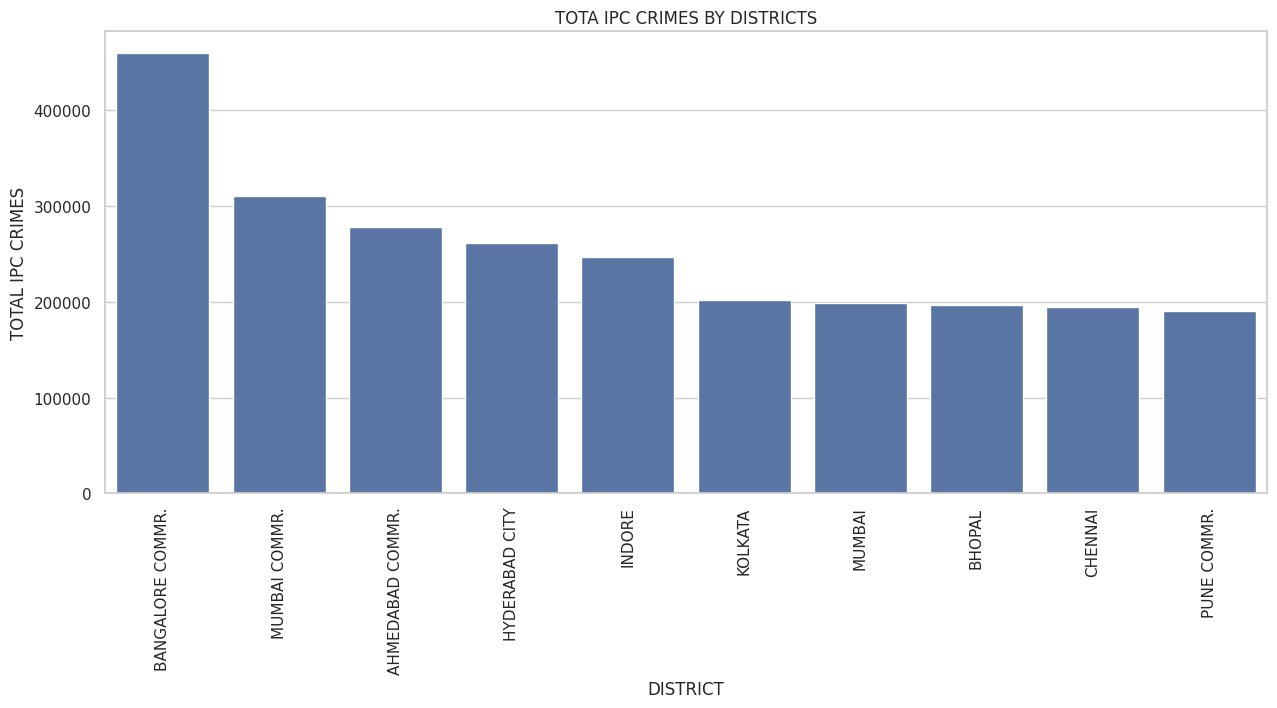

In [153]:
top_10_districts_SensitiveAreas = SensitiveAreas.sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)

plt.figure(figsize = (15,6))
sns.barplot(x = 'DISTRICT', y = 'TOTAL IPC CRIMES', data = top_10_districts_SensitiveAreas)
plt.title('TOTA IPC CRIMES BY DISTRICTS')
sns.set(style = 'whitegrid')
plt.xticks(rotation = 90)
plt.show()

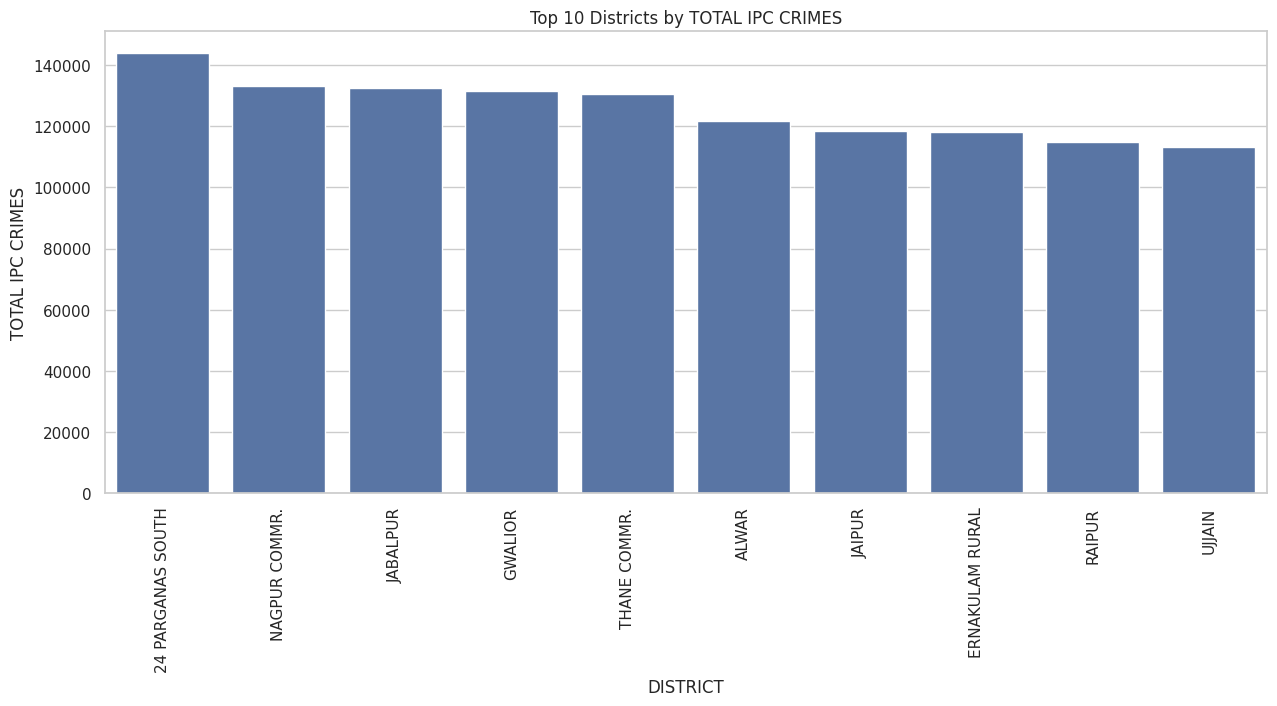

In [149]:
top_10_districts_ModerateAreas = ModerateAreas.sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES', data=top_10_districts_ModerateAreas)
plt.title('Top 10 Districts by TOTAL IPC CRIMES')
sns.set(style='whitegrid')
plt.xticks(rotation=90)
plt.show()

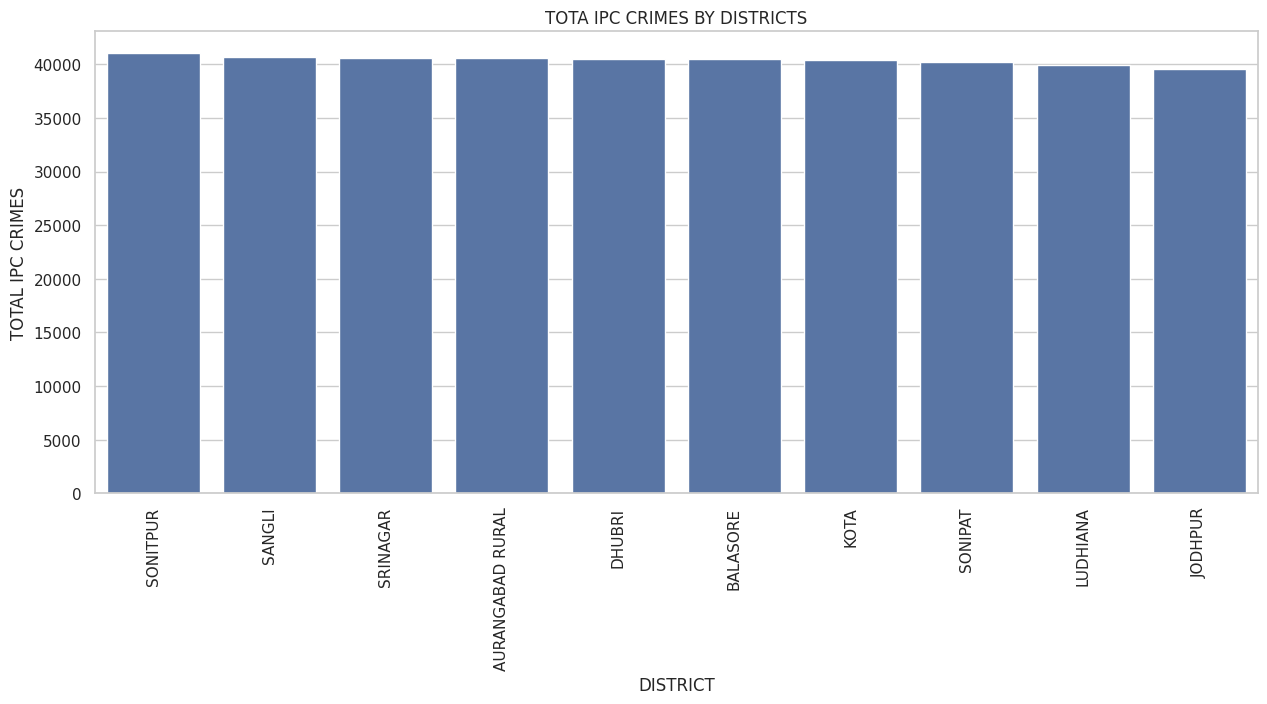

In [148]:
top_10_districts_PeacefulAreas = PeacefulAreas.sort_values(by='TOTAL IPC CRIMES', ascending=False).head(10)

plt.figure(figsize = (15,6))
sns.barplot(x = 'DISTRICT', y = 'TOTAL IPC CRIMES', data = top_10_districts_PeacefulAreas)
plt.title('TOTA IPC CRIMES BY DISTRICTS')
sns.set(style = 'whitegrid')
plt.xticks(rotation = 90)
plt.show()

**By observing above 3 bar chrats,**

* **Top 10 Districts in Sensitive Areas:**
     1. Bangalore Commr.: Highest total IPC crimes among the top 10 districts.Relatively high crimes against women.Consider increased law enforcement and targeted programs.
     2. Mumbai Commr.: Second-highest total IPC crimes.Notable crimes against children.Addressing child protection issues is crucial.
     3. Ahmedabad Commr.:High total IPC crimes with a significant focus on crimes against women.Tailor interventions to address crimes against women.

* **Top 10 Districts in Moderate Areas:**
     1. 24 Parganas South:Highest total IPC crimes among the top 10 districts.Significant crimes against women.Comprehensive measures required for overall crime reduction.
     2. Nagpur Commr.:High total IPC crimes with a focus on crimes against children.Address child protection and community engagement.
     3. Jabalpur: Significant total IPC crimes. Moderate crimes against children and women. Balanced interventions for various crime types.

* **Top 10 Districts in Peaceful Areas:**
     1. Sonitpur: Highest total IPC crimes in the peaceful category. Crimes against women and children relatively lower.Implement preventive measures to maintain peace.
     2. Sangli: High total IPC crimes with lower crimes against women and children.Consider community engagement and awareness.
     3. Srinagar :Moderate total IPC crimes, no crimes against children reported.Focus on maintaining peace and community well-being.

### **Each category (Sensitive, Moderate, Peaceful) exhibits diverse crime profiles, emphasizing the need for tailored interventions.Crimes against women are a significant concern across all categories, necessitating targeted efforts for women's safety.Crimes against children vary across categories, indicating the need for focused child protection measures, especially in Sensitive and Moderate Areas.**

## DISTRICT for TOTAL CRIMES AGAINST CHILDREN in SensitiveAreas,ModerateAreas and PeacefulAreas

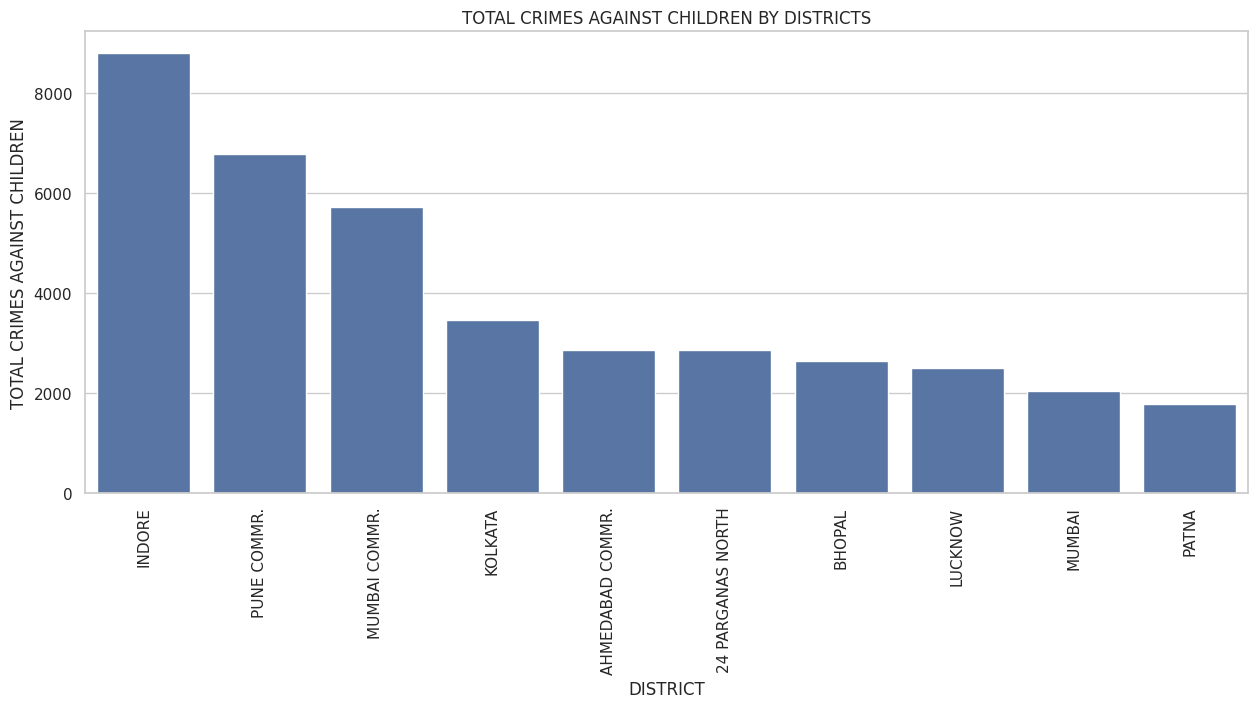

In [167]:
top_10_districts_SensitiveAreas = SensitiveAreas.sort_values(by='TOTAL CRIMES AGAINST CHILDREN', ascending=False).head(10)

plt.figure(figsize = (15,6))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST CHILDREN', data = top_10_districts_SensitiveAreas)
plt.title('TOTAL CRIMES AGAINST CHILDREN BY DISTRICTS')
sns.set(style = 'whitegrid')
plt.xticks(rotation = 90)
plt.show()

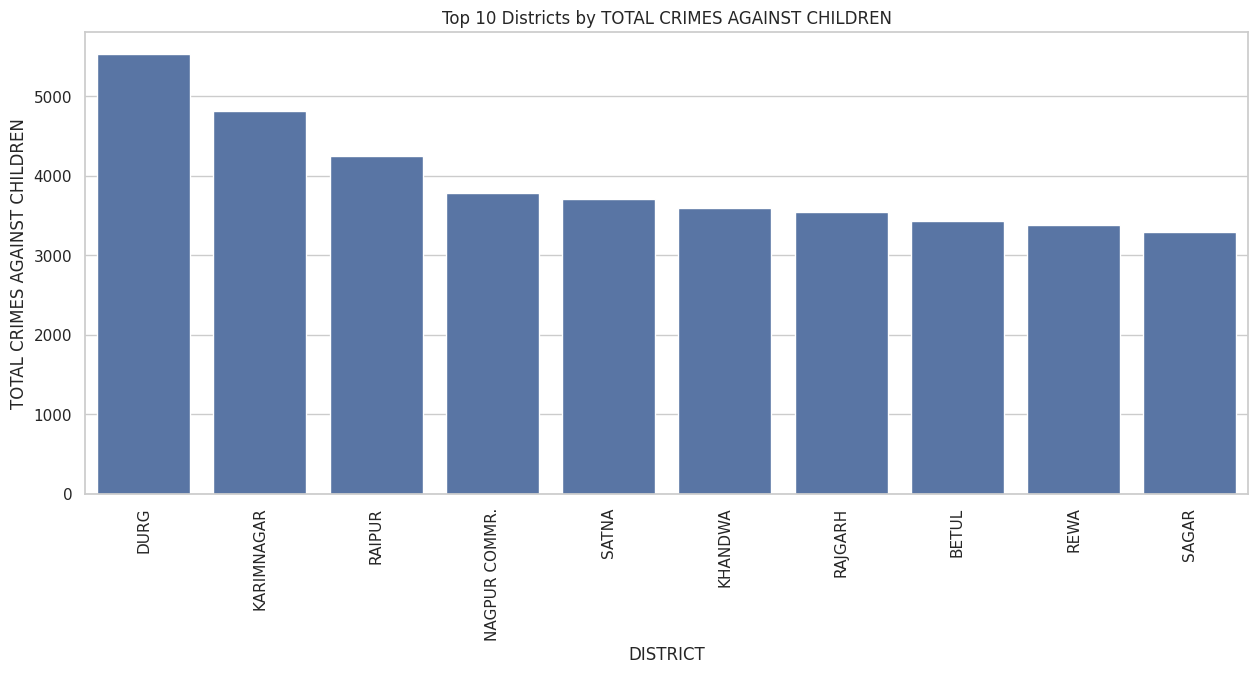

In [168]:
top_10_districts_ModerateAreas = ModerateAreas.sort_values(by='TOTAL CRIMES AGAINST CHILDREN', ascending=False).head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='DISTRICT', y='TOTAL CRIMES AGAINST CHILDREN', data=top_10_districts_ModerateAreas)
plt.title('Top 10 Districts by TOTAL CRIMES AGAINST CHILDREN')
sns.set(style='whitegrid')
plt.xticks(rotation=90)
plt.show()

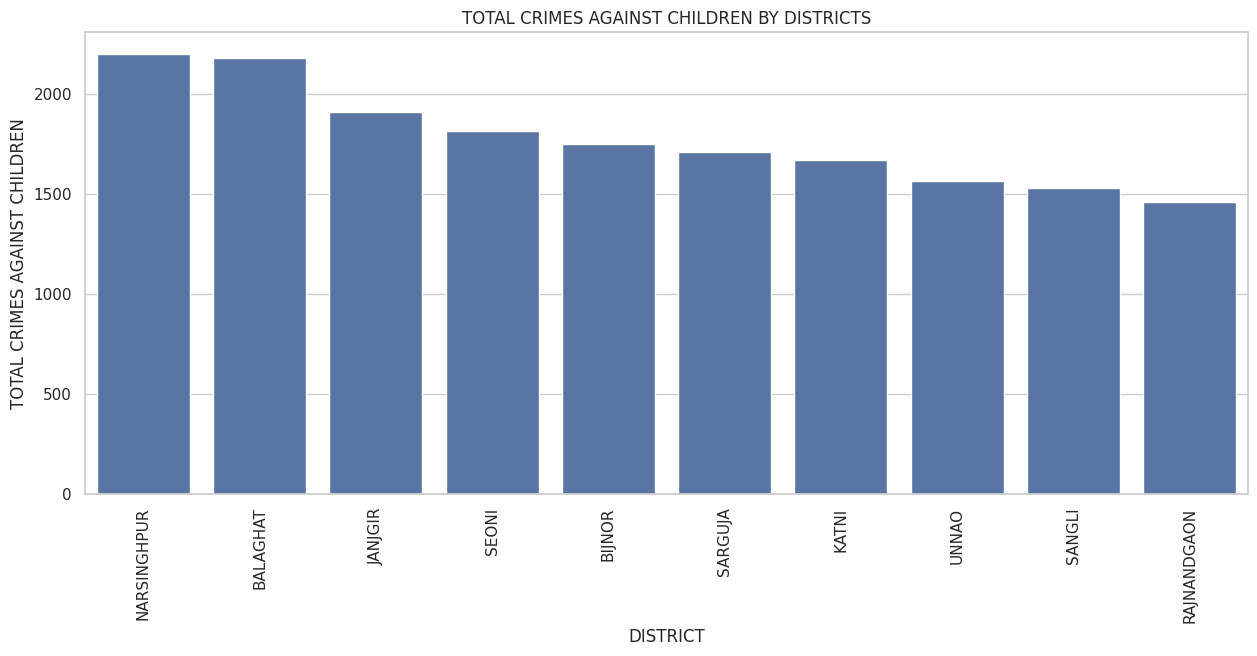

In [169]:
top_10_districts_PeacefulAreas = PeacefulAreas.sort_values(by='TOTAL CRIMES AGAINST CHILDREN', ascending=False).head(10)

plt.figure(figsize = (15,6))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST CHILDREN', data = top_10_districts_PeacefulAreas)
plt.title('TOTAL CRIMES AGAINST CHILDREN BY DISTRICTS')
sns.set(style = 'whitegrid')
plt.xticks(rotation = 90)
plt.show()

**Observation from above 3 charts,**

1. Sensitive Areas:

     - The top districts in Sensitive Areas exhibit extremely high total IPC crime rates, with Indore in Madhya Pradesh leading the list.Notable incidents of crimes against women are observed, especially in districts like Mumbai and Ahmedabad.Metropolitan cities like Mumbai, Pune, and Kolkata are prominent in this category, suggesting the complexity of urban crime dynamics.
2. Moderate Areas:

     - The top districts in Moderate Areas have comparatively lower total IPC crime rates compared to Sensitive Areas.Districts from various states such as Chhattisgarh, Andhra Pradesh, Maharashtra, and Madhya Pradesh are represented.Some districts, like Karimnagar in Andhra Pradesh, show higher incidents of crimes against children.

3. Peaceful Areas:

    -  Peaceful Areas have districts with lower total IPC crime rates, indicating a generally safe environment.Many districts in this category are from states like Madhya Pradesh and Chhattisgarh, with a mix of rural and semi-urban settings.

**Madhya Pradesh and Chhattisgarh appear in all three categories, suggesting a diverse range of crime patterns within these states.The issue of crimes against children appears across all categories, highlighting the need for targeted interventions in child safety programs.**


### **To prevent Crime against childers,**

- Community Outreach: Engage with communities in metropolitan areas to build trust and encourage reporting of crimes.
- Youth Development: Invest in youth development programs to provide constructive activities and reduce the likelihood of delinquency.
- Enhanced Surveillance: Implement smart policing and surveillance measures to proactively identify and address emerging challenges.
- Infrastructure Development: Focus on infrastructure development in rural and semi-urban areas to ensure safety.

## DISTRICT for TOTAL CRIMES AGAINST WOMEN in SensitiveAreas,ModerateAreas and PeacefulAreas

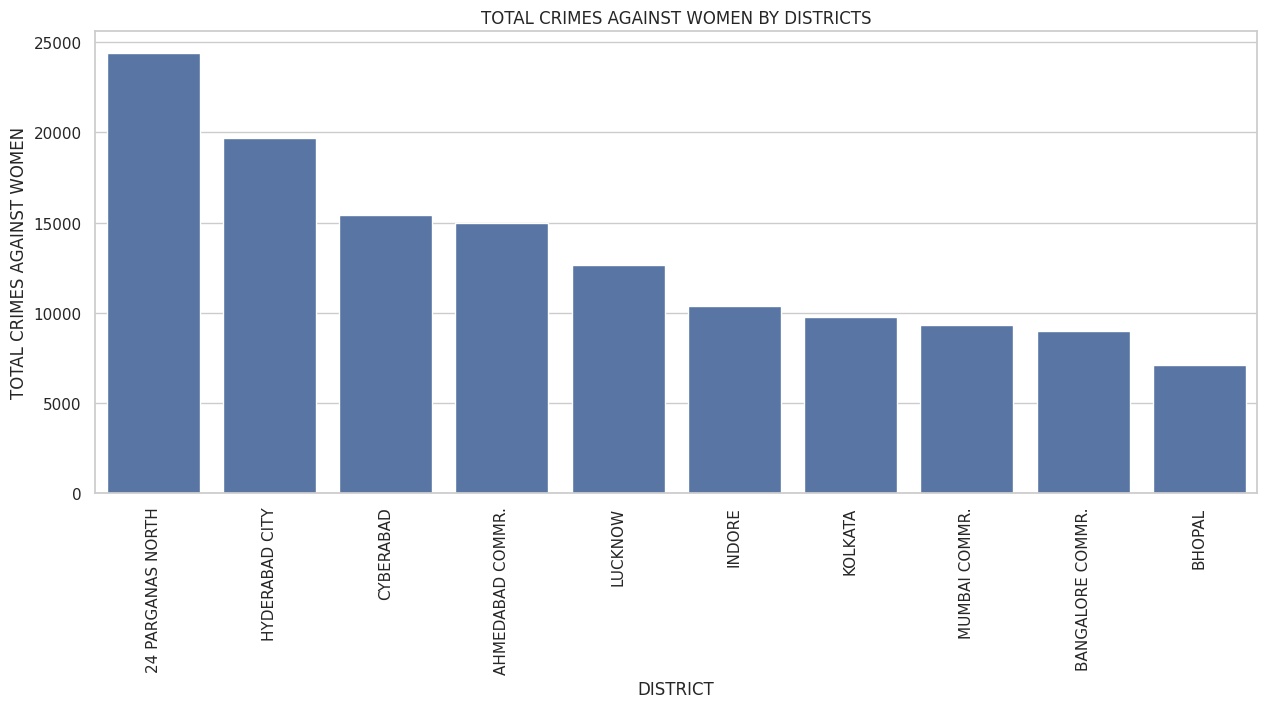

In [173]:
top_10_districts_SensitiveAreas = SensitiveAreas.sort_values(by='TOTAL CRIMES AGAINST WOMEN', ascending=False).head(10)

plt.figure(figsize = (15,6))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST WOMEN', data = top_10_districts_SensitiveAreas)
plt.title('TOTAL CRIMES AGAINST WOMEN BY DISTRICTS')
sns.set(style = 'whitegrid')
plt.xticks(rotation = 90)
plt.show()

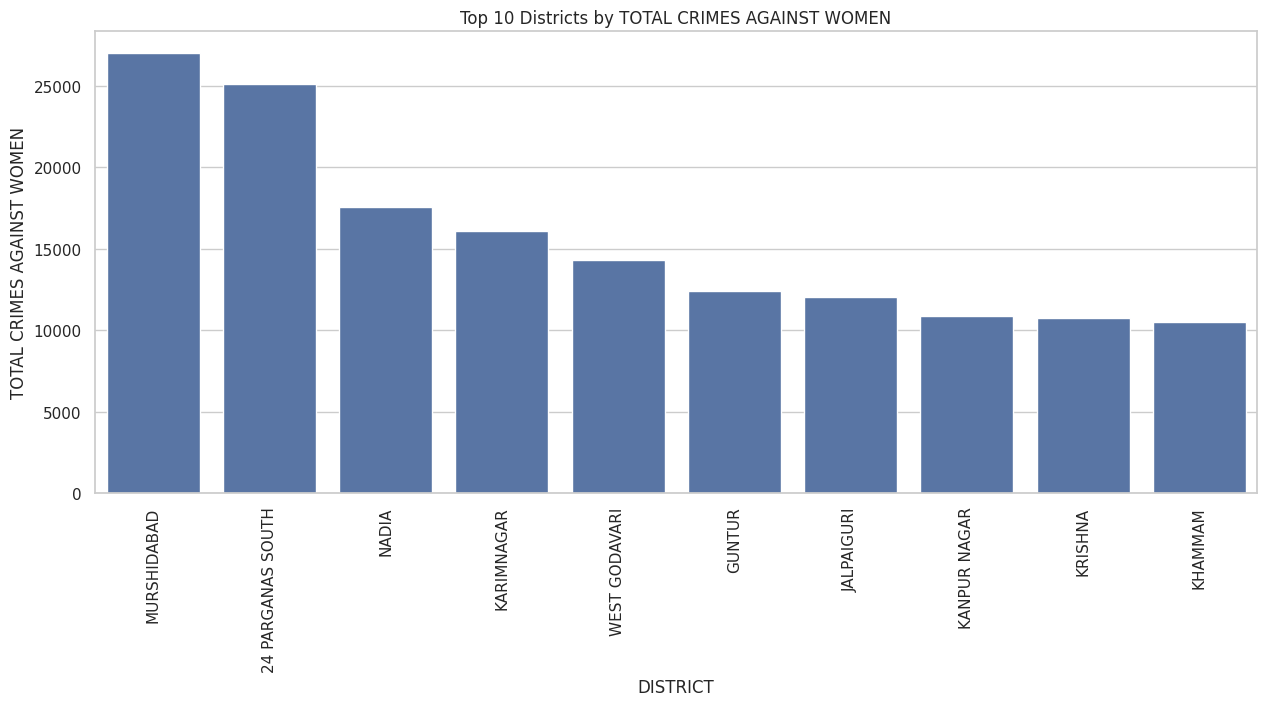

In [174]:
top_10_districts_ModerateAreas = ModerateAreas.sort_values(by='TOTAL CRIMES AGAINST WOMEN', ascending=False).head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='DISTRICT', y='TOTAL CRIMES AGAINST WOMEN', data=top_10_districts_ModerateAreas)
plt.title('Top 10 Districts by TOTAL CRIMES AGAINST WOMEN')
sns.set(style='whitegrid')
plt.xticks(rotation=90)
plt.show()

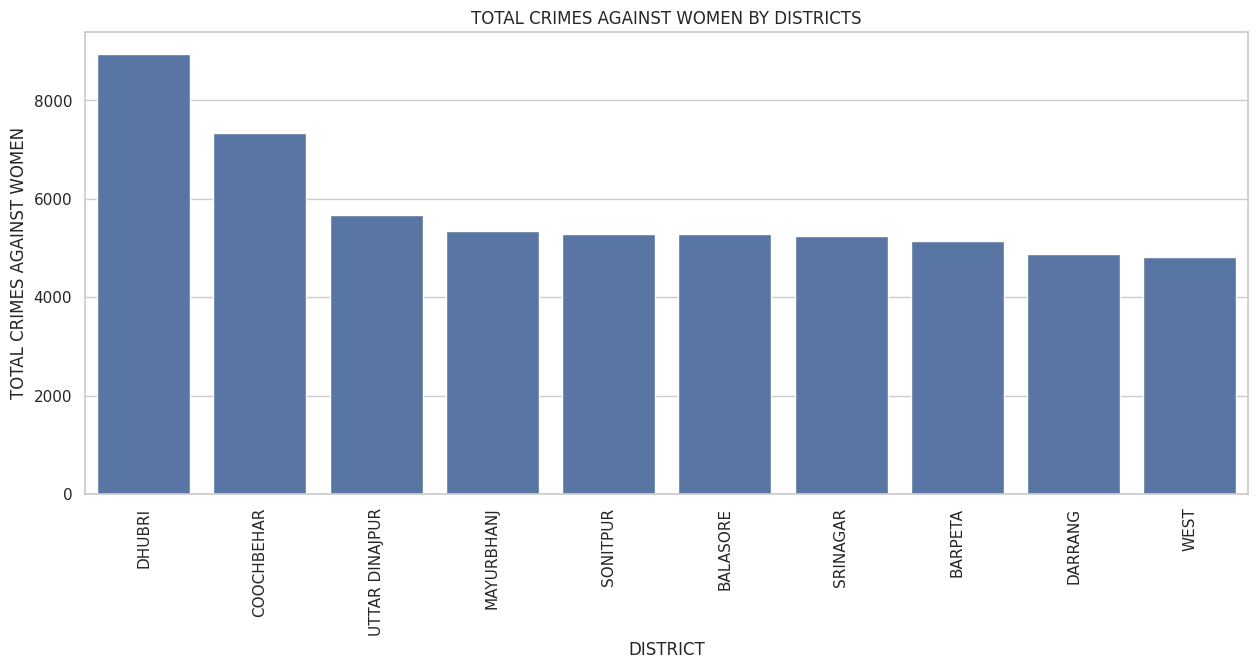

In [175]:
top_10_districts_PeacefulAreas = PeacefulAreas.sort_values(by='TOTAL CRIMES AGAINST WOMEN', ascending=False).head(10)

plt.figure(figsize = (15,6))
sns.barplot(x = 'DISTRICT', y = 'TOTAL CRIMES AGAINST WOMEN', data = top_10_districts_PeacefulAreas)
plt.title('TOTAL CRIMES AGAINST WOMEN BY DISTRICTS')
sns.set(style = 'whitegrid')
plt.xticks(rotation = 90)
plt.show()

**Observation from above 3 charts,**

* Insights for Top 10 Districts in Sensitive Areas:
   1. Murshidabad :Highest "TOTAL CRIMES AGAINST WOMEN" with 27,004 cases.
Requires targeted interventions and awareness programs to address crimes against women.
   2. 24 Parganas South: Second-highest for crimes against women with 25,115 cases.Similar to Murshidabad, specific attention is needed for women's safety.
   3. Nadia: Reported 17,582 cases of crimes against women.Efforts should be made to improve safety and preventive measures.

* Insights for Top 10 Districts in Moderate Areas:
   1. Dhubri: Highest for crimes against women in the Moderate Areas group.
Strategies for community involvement and law enforcement collaboration are vital.
   2. Coochbehar: Reported 7,334 cases, necessitating localized efforts to enhance safety.
   3. Uttar Dinajpur: Crimes against women reported at 5,667.

* Insights for Top 10 Districts in Peaceful Areas:

   1. Srinagar :Reported 5,248 cases, highlighting the importance of maintaining and enhancing peace.
   2. Balasore : Crimes against women reported at 5,278.
   3. Barpeta :Highest among the top 10 districts in Assam.

### **To Prevent crime Against Womens**

- Education and Awareness
- Law Enforcement
- Community Engagement

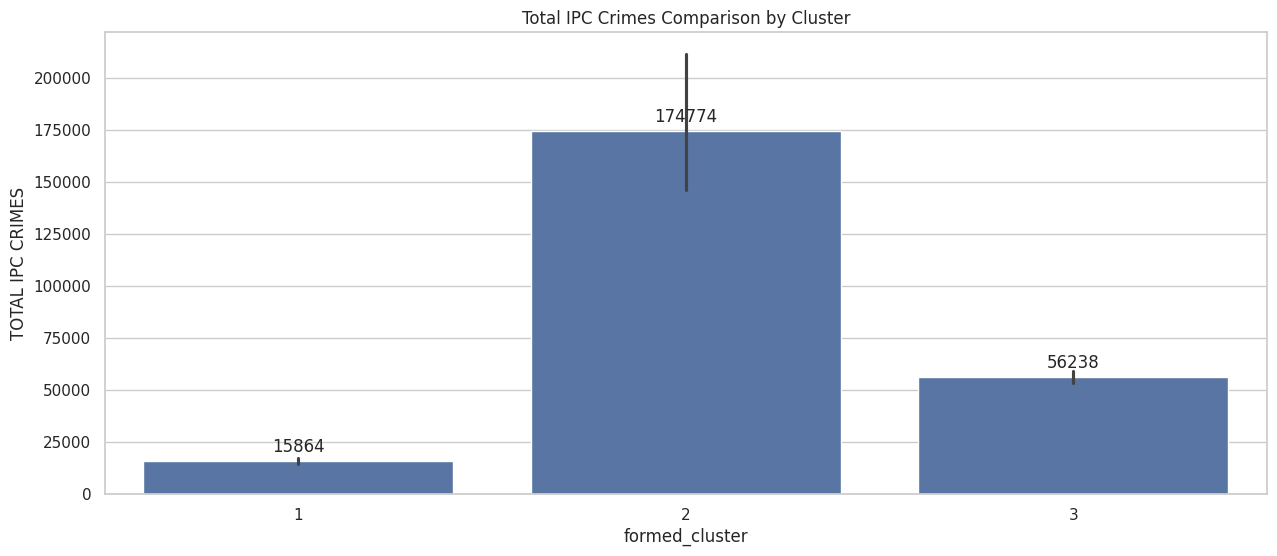

In [159]:

plt.figure(figsize=(15,6))
ax = sns.barplot(x='formed_cluster', y='TOTAL IPC CRIMES', data=main_df)

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Total IPC Crimes Comparison by Cluster')
plt.show()

**Observation from above chart,**
- Cluster 1 has the highest total IPC crimes, followed by Cluster 3 and Cluster 2.
- The visual difference in bar heights suggests significant variations in the total IPC crimes among the clusters.

In [164]:
crime_df

,formed_cluster,Crime Type,Count
0,1,MURDER,138887
1,2,MURDER,42516
2,3,MURDER,213969
3,1,RAPE,78610
4,2,RAPE,24244
5,3,RAPE,129378
6,1,KIDNAPPING & ABDUCTION,107469
7,2,KIDNAPPING & ABDUCTION,47984
8,3,KIDNAPPING & ABDUCTION,176090
9,1,ROBBERY,71368


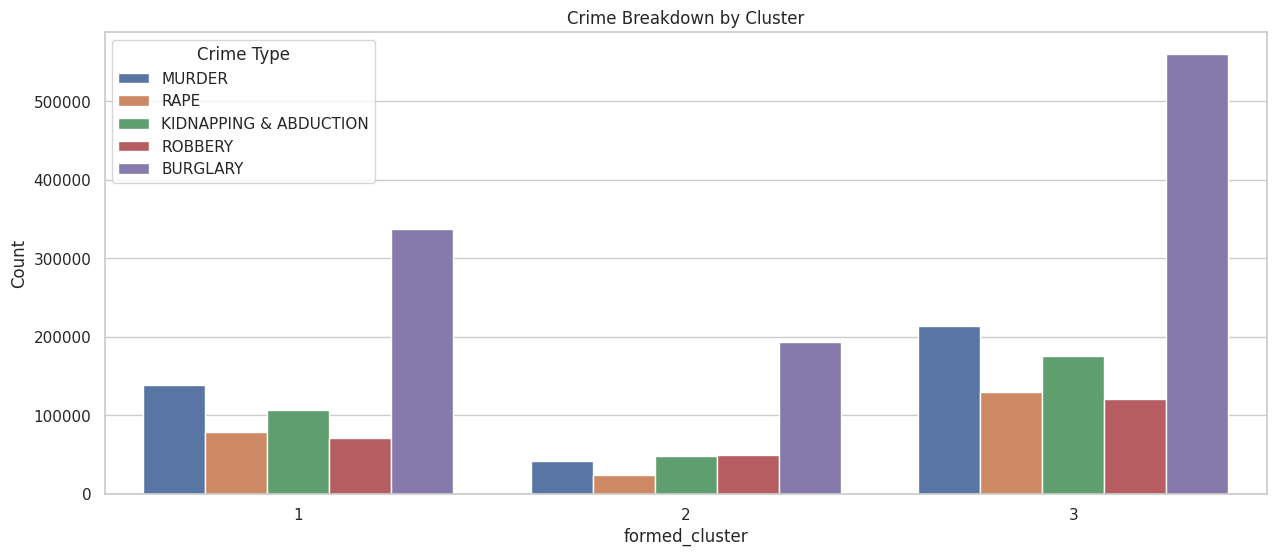

In [165]:
plt.figure(figsize=(15,6))
crime_types = ['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'ROBBERY', 'BURGLARY']

crime_df = main_df.groupby('formed_cluster')[crime_types].sum().reset_index()
crime_df = pd.melt(crime_df, id_vars='formed_cluster', var_name='Crime Type', value_name='Count')

sns.barplot(x='formed_cluster', y='Count', hue='Crime Type', data=crime_df)
plt.title('Crime Breakdown by Cluster')
plt.show()


**Observation from above chart,**

* Murder: Cluster 3 has the highest count of murders, followed by Cluster 1 and Cluster 2.
This indicates that areas in Cluster 3 are experiencing a higher number of murders compared to the other clusters.

* Rape:
Similar to murders, Cluster 3 also has the highest count of rape cases, followed by Cluster 1 and Cluster 2.
The distribution pattern is consistent with murder cases.
* Kidnapping & Abduction:
Cluster 3 again leads in the count of kidnapping and abduction cases, followed by Cluster 1 and Cluster 2.
High counts in Cluster 3 may suggest a concerning trend for this crime type.
* Robbery:
Cluster 3 has the highest count of robberies, followed by Cluster 2 and Cluster 1.
This highlights the prevalence of robbery cases in Cluster 3.
* Burglary:
Similar to other crime types, Cluster 3 has the highest count of burglaries, followed by Cluster 1 and Cluster 2.
Burglaries are more concentrated in Cluster 3.

# **4.4 Capstone project overall story in your own words. Min 1000 words.**

## **Title: "Navigating India's Crime Landscape (2001-2012): A Comprehensive Analysis and Roadmap for Progress"**

### **Introduction:**
India, spanning the years 2001 to 2012, witnessed a complex tapestry of criminal incidents that permeated the nation. A deep dive into crime data reveals a multifaceted landscape marked by widespread criminal activities, concerns for vulnerable populations like women and children, societal challenges reflected in crime statistics, urban complexities, socio-economic disparities, law enforcement hurdles, and intricate regional dynamics. This period underscores the need for a nuanced understanding of crime trends to inform targeted interventions, policy reforms, and collaborative efforts to enhance public safety.

Widespread Criminal Incidents:
Crime, unfortunately, was a pervasive issue during this era, with elevated instances of murder, rape, and kidnapping reported across various states and Union Territories. The magnitude of these incidents painted a grim picture of the challenges faced by law enforcement agencies in maintaining public order and safety.

Concerns for Women and Children:
One of the most alarming aspects of the crime landscape was the significant rise in crimes against women, particularly instances of rape and dowry deaths. Additionally, crimes against children highlighted the vulnerability of these demographics, calling for urgent attention and protective measures.

Societal Challenges Reflected in Crime Data:
The crime data vividly reflected deep-seated societal challenges. Dowry deaths, offenses against Scheduled Castes (SCs) and Scheduled Tribes (STs), and the prevalence of riots underscored the need for a holistic approach to address underlying social issues contributing to criminal activities.

Urban Challenges:
Urban areas, with Delhi serving as a poignant example, grappled with a substantial burden of crime. This pointed to the unique challenges associated with densely populated metropolitan regions, emphasizing the importance of tailored urban crime prevention strategies.

Socio-Economic Disparities:
A correlation between socio-economic development and crime rates was evident, with states boasting higher literacy rates and better economic conditions reporting lower crime rates. This highlights the potential impact of education and economic prosperity in crime prevention.

Law Enforcement Challenges:
The high incidence of crimes underscored persistent challenges for law enforcement agencies, calling for strategic reforms, increased resources, and enhanced training to effectively combat a wide range of criminal activities.

Complex Regional Dynamics:
Different states exhibited diverse patterns of crime, reflecting the complex interplay of regional dynamics, cultural factors, and socio-economic conditions. Understanding these nuances is crucial for designing region-specific interventions.

Total IPC Crimes:
The cumulative total of IPC crimes across the country during this period was substantial, emphasizing the imperative for comprehensive strategies to address and prevent criminal activities at a national level.

Criminal Justice System Pressures:
The sheer volume of reported crimes indicated significant pressures on the criminal justice system, including the police, judiciary, and correctional facilities. This calls for a reevaluation of the existing systems and the exploration of innovative approaches to streamline and strengthen the criminal justice system.

Opportunities for Improvement:
The crime data provides valuable insights for policymakers, law enforcement, and communities to identify areas for improvement. Implementing targeted interventions and fostering collaborative efforts can be instrumental in enhancing public safety and mitigating the root causes of criminal activities.

Overview of Crimes in different States and UTs:
During the specified period, certain states and Union Territories exhibited distinctive patterns in crime rates, presenting a nuanced understanding of the socio-economic and regional factors influencing the safety and security landscape.

States such as Andhra Pradesh, Bihar, Delhi, Madhya Pradesh, Maharashtra, and Uttar Pradesh experienced notably high crime rates across various categories, indicating complex challenges associated with both urban dynamics and socio-economic conditions. In contrast, states like Arunachal Pradesh, Goa, and Sikkim reported comparatively lower crime rates, signaling a relatively more secure environment attributed to factors like lower population density, cultural dynamics, and effective law enforcement.

The crime landscape extended beyond violent offenses, revealing pervasive issues such as theft, which reached substantial numbers in states like Delhi and Maharashtra. Instances of riots, reflecting social unrest, were also reported extensively in states like Uttar Pradesh and Madhya Pradesh. Dowry deaths, a societal concern, were particularly notable in states with higher crime rates, including Andhra Pradesh and Bihar. Crimes against children and women, encompassing a range of offenses, were prevalent in these high-crime regions, with Uttar Pradesh and Madhya Pradesh reporting significant figures.

Moreover, significant cases of crimes against Scheduled Castes (SCs) and Scheduled Tribes (STs) were reported. The vulnerability of these marginalized communities was evident in the reported figures, with higher counts in states like Uttar Pradesh and Madhya Pradesh. The data indicated a concerning intersectionality between crime rates and caste dynamics, emphasizing the need for targeted interventions and social reforms.

Conversely, states with comparatively lower overall crime rates, such as Arunachal Pradesh, Goa, and Sikkim, also reported fewer instances of crimes against SCs and STs. The relatively secure environment in these states extended to a lower incidence of crimes targeting marginalized communities.

Involvement of juveniles poses a serious threat to society, as they can easily be led astray. Stricter laws are needed to address this issue. The number of recorded cases has increased over the years, with Madhya Pradesh having the highest and Manipur the lowest.

Police violations contribute significantly to overall crime rates. The year 2009 saw the highest number of recorded cases. Chattisgarh reported the most cases of human rights violations from 2001 to 2010.

Those responsible for maintaining law and order, like the police, also face assaults from various sources. Uttar Pradesh recorded numerous cases from 2001 to 2010.



## **Conclusion:**
The comprehensive analysis of India's crime landscape from 2001 to 2012 reveals a tapestry of challenges, opportunities, and complexities. While the data sheds light on the prevalence of crime and its various manifestations, it also serves as a guide for policymakers, law enforcement agencies, and communities to navigate towards a safer and more secure future. Strategic reforms, targeted interventions, and collaborative efforts are essential to address the multifaceted issues highlighted in the crime data, fostering a society where safety and justice prevail.